In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
path =r'C:\Users\osutr_000\Documents\tennis_atp-master' # use your path
allFiles = glob.glob(path + "/*.csv")
matches = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, encoding='ISO-8859-1')
    list_.append(df)
matches = pd.concat(list_)


In [4]:
# Assign a random number 1 or 2. We will use it to randomize the winner column
matches['winner']=np.random.randint(1,3,matches.shape[0])

In [7]:
# Since we are interested in the US Open we only want to look at hard court match history
hard_court = matches[matches.surface=='Hard']
hard_court = hard_court[['winner_rank_points','winner_rank','winner_seed','winner_age','winner_ioc','winner_hand', 'winner_ht',
                         'loser_rank_points', 'loser_rank','loser_seed', 'loser_age','loser_ioc','loser_hand', 'loser_ht',
                         'tourney_level','tourney_date','winner',]].fillna("")
len(hard_court)

63460

In [8]:
# Dividing the dataframe by the random number and then reassign the column names 
df1a = pd.DataFrame(hard_court[hard_court.winner==1])
df1a.columns = ['p1_points','p1_rank','p1_seed','p1_age','p1_ioc','p1_hand', 'p1_ht',
                'p2_points','p2_rank','p2_seed','p2_age','p2_ioc','p2_hand','p2_ht','level','date','winner']


In [9]:
# Dividing the dataframe by the random number and then reassign the column names 
df1b = pd.DataFrame(hard_court[hard_court.winner==2])
df1b.columns = ['p2_points','p2_rank','p2_seed','p2_age','p2_ioc','p2_hand','p2_ht',
                'p1_points','p1_rank','p1_seed','p1_age','p1_ioc','p1_hand','p1_ht','level', 'date','winner']


In [10]:
# Recombine the dataframe. Now it has randomized/anonymity the winner
df2 = pd.concat([df1a,df1b])
df2.sort_index()

,date,level,p1_age,p1_hand,p1_ht,p1_ioc,p1_points,p1_rank,p1_seed,p2_age,p2_hand,p2_ht,p2_ioc,p2_points,p2_rank,p2_seed,winner
0,20160104,A,34.4066,R,185,SUI,8265,3,1,25.0212,R,196,CAN,2170,14,4,2
0,20120730,A,30.6393,R,188,USA,1955,15,1,32.8214,R,175,GER,627,77,,1
0,19720305,A,25.2238,R,193,USA,,,,24.5749,R,,HUN,,,,1
0,19980119,G,26.4394,R,185,USA,4547,1,1,21.3634,R,193,NED,792,52,,1
0,19890828,G,29.4757,R,188,USA,0,1,1,27.5483,R,178,URU,0,127,,1
0,19800408,A,21.6454,R,185,ARG,0,17,1,23.6057,L,183,FRA,0,150,,1
0,20010115,G,24.3477,R,190,BRA,4195,1,1,22.1027,R,175,ARG,945,38,,1
0,20080107,A,24.4846,R,185,RUS,890,34,,21.5551,R,185,FRA,1930,8,1,2
0,20151005,A,30.5216,R,183,SUI,6005,4,1,36.8542,R,185,CZE,187,255,,1
0,19860826,G,25.295,L,185,USA,0,96,,26.4668,R,188,USA,0,1,1,2


In [11]:
df2.level.unique()

array(['A', 'D', 'M', 'G', 'F', 'C'], dtype=object)

In [12]:
# Categorical data needs to be coded for logistic regression
cleanup_nums = {"p1_hand":     {"R": -1, "L": 1, "U": -1},
                "p2_hand":     {"R":-1, "L": 1, "U": -1},
                "level":       {"G":5, "A":1, "M":1, "D": 1, "F": 1, "C": 1}
               }
df2.replace(cleanup_nums, inplace=True)
df2.head()

,date,level,p1_age,p1_hand,p1_ht,p1_ioc,p1_points,p1_rank,p1_seed,p2_age,p2_hand,p2_ht,p2_ioc,p2_points,p2_rank,p2_seed,winner
61,19680914,1,30.0999,1,173,AUS,,,1,,-1,,USA,,,,1
62,19680914,1,21.0459,-1,180,USA,,,,,-1,,USA,,,,1
63,19680914,1,27.3046,-1,188,RSA,,,10,,-1,,GER,,,,1
64,19680914,1,23.6167,-1,185,USA,,,,15.3758,-1,,USA,,,,1
66,19680914,1,33.5359,-1,,AUS,,,,21.462,-1,175,USA,,,,1


In [13]:
# Fix datatypes
df2 = df2.apply(pd.to_numeric, errors='ignore')
df2.dtypes

date           int64
level          int64
p1_age       float64
p1_hand      float64
p1_ht        float64
p1_ioc        object
p1_points    float64
p1_rank      float64
p1_seed      float64
p2_age       float64
p2_hand      float64
p2_ht        float64
p2_ioc        object
p2_points    float64
p2_rank      float64
p2_seed      float64
winner         int32
dtype: object

In [14]:
# Feature aims to identify a veteran vs a newcomer
df2['p1_career_points'] = df2.p2_points.cumsum()
df2['p2_career_points'] = df2.p2_points.cumsum()

In [15]:
bracket = pd.DataFrame.from_csv('data/us_open_bracket.csv', index_col=None, encoding='ISO-8859-1')
ranking = pd.DataFrame.from_csv('data/atp_rankings.csv', index_col=0, encoding='ISO-8859-1')

In [16]:

rankings = df2[['p1_rank','p2_rank']]
seeds = df2[['p1_seed','p2_seed']]
ages = df2[['p1_age','p2_age']]
points = df2[['p1_points','p2_points']]

In [25]:
# Calculated columns for head to head match-up
df3 = pd.DataFrame()
df3['ht_delta'] = (df2.p1_ht - df2.p2_ht)
df3['points_delta'] = (df2.p1_points - df2.p2_points)
df3['career_points_delta'] = (df2.p1_career_points - df2.p2_career_points)
df3['age_delta'] = (df2.p1_age - df2.p2_age)
df3['seed_delta'] = (df2.p1_seed - df2.p2_seed)
df3['hand_delta'] = (df2.p1_hand - df2.p2_hand)
df3['min_age'] = ages.min(axis=1)
df3['min_seeds'] = seeds.min(axis=1)
df3['min_rank'] = rankings.min(axis=1)
df3['level'] = df2.level
df3['winner'] = df2.winner
len(df3.index)

63460

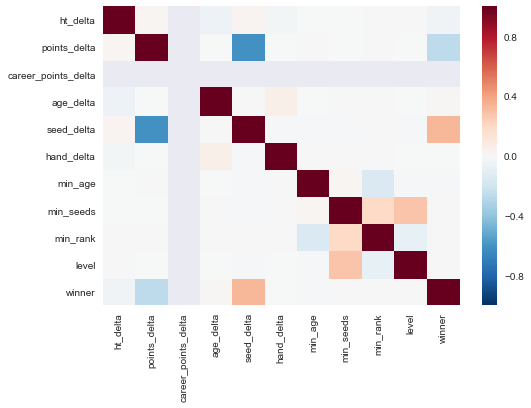

In [26]:
# Analysis of variable correlation
corr = df3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
#Remove rows that have missing values
df4=df3.dropna()
len(df4)

5135

In [49]:
# Split the data into a training and test set.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df4[[ 'age_delta','seed_delta',
                                                     'hand_delta','min_age']].values, 
                                              (df4.winner == 1).values)



In [50]:
# Logistic regression algorithm
clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xtrain, Ytrain)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtest), Ytest))

0.652647975078


In [51]:
# SCV algorithm
score_list=[]
Cs = [0.01, 0.1, 1, 10, 100]

for c in Cs:
    clf = sklearn.svm.SVC( C=c).fit(Xtrain, Ytrain)
    score_list.append(clf.score(Xtest, Ytest))
print(score_list)

[0.52881619937694702, 0.64018691588785048, 0.62461059190031154, 0.5669781931464174, 0.56074766355140182]


In [52]:
# recursive feature extraction
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(Xtrain, Ytrain)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 1
Selected Features: [False  True False False]
Feature Ranking: [2 1 4 3]
